 # Uso de Lambdify para evaluar una función simbólica como función numérica

En primer lugar hay que cargar el módulo Sympy y luego trabajar ya con Lambdify

# Inicializando Sympy
Este paquete carga sympy y lo prepara para trabajar

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.7.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/



El comando init_session llevaría a cabo algunas acciones por nostros:

    Gracias a use_latex=True obtenemos la salida en 𝐿𝐴𝑇𝐸𝑋.
    Crea una serie de variables para que podamos ponernos a trabajar en el momento.

Para más información, accceder a la documentación de Sympy:

https://docs.sympy.org/latest/index.html

Creamos los simbolos habituales (reales y complejos) así como las Funciones

In [2]:
a, b, c = symbols('a b c')   # La opción symbols('a',real=TRUE) restringiría el rango de la variable

In [3]:
C = symbols('C', complex='True')

In [4]:
w = symbols('Omega')
W = symbols('omega')
w, W

# Trabajamos con Lambdify

Comenzamos importanto la biblioteca numpy para poder disponer de arrays por ejemplo.

In [5]:
import numpy as np

Creamos una expresión a evaluar

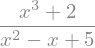

In [6]:
expr = (x**3 +2)/(x**2 - x + 5)
expr

Si queremos evaluar un único valor, tan solo hay que indicarlo:

In [7]:
expr.subs(x,2).evalf()

Pero si queremos que se value en un rango de valores, comenzaremos por definir una tupla con dichos valores:

In [8]:
x_lin=np.linspace(0.0,1.0,num=11)
x_lin

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Creamos la expresión para poder evaluarla numéricamente a partir de la espresión simbólica:

In [9]:
expr_numerica = lambdify(x,expr)

Para cálculos directos sigue funcionando...

In [10]:
expr_numerica(2)

Pero para tuplas falla por que no utiliza por defecto la librería numpy. 

NOTA: PArece que en las últimas versiones ya lo hace correctamente.

In [11]:
expr_numerica(x_lin)

array([0.4       , 0.40753564, 0.41487603, 0.42317328, 0.43361345,
       0.44736842, 0.46554622, 0.48914405, 0.51900826, 0.55580448,
       0.6       ])

Si le indicamos como argumento la librería a utilizar, debería funcionar correctamente

In [12]:
expr_numerica = lambdify(x,expr,np)

In [13]:
expr_numerica(x_lin)

array([0.4       , 0.40753564, 0.41487603, 0.42317328, 0.43361345,
       0.44736842, 0.46554622, 0.48914405, 0.51900826, 0.55580448,
       0.6       ])